# Interpretability of Machine Learning algorithms @ 2021
  ### Mohamed Ibn Khedher & Mounim A. El-Yacoubi

**SHAP (SHapley Additive exPlanations)**

SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2016) [1] is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley Values.

The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the “payout” (= the prediction) among the features. A player can be an individual feature value, e.g. for tabular data. A player can also be a group of feature values. For example to explain an image, pixels can be grouped to super pixels and the prediction distributed among them. One innovation that SHAP brings to the table is that the Shapley value explanation is represented as an additive feature attribution method, a linear model. That view connects LIME and Shapley Values. SHAP specifies the explanation as:
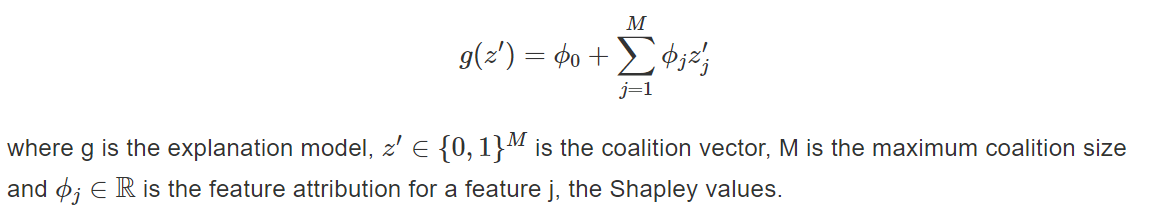

For more information about the technique SHAP and its variants, we invite you to consult the reference [2].

[1] Lundberg, Scott M., and Su-In Lee. “A unified approach to interpreting model predictions.” Advances in Neural Information Processing Systems. 2017.

[2]  https://christophm.github.io/interpretable-ml-book/shap.html#fn69

# The objective of this lab is to interpret the decisions taken by Machine Learning algorithms using the SHAP technique. We are studying the application of detecting whether the patient has alzhemer's disease or not.


## We considered the following ML algorithms
### 1. Decision Tree ([DT](https://scikit-learn.org/stable/modules/tree.html))
### 1. Random Forest ([RF](https://scikit-learn.org/stable/modules/ensemble.html))
### 3. XGBoost ([XGB](https://xgboost.readthedocs.io/en/latest/python/index.html))
### 4. Deep Learning (DL)


### **The first step before launching the notebook, it would be necessary manually upload the attached database file "oasis_longitudinal.csv" on colab.**

##**TODO:**
#### **shape_value is a matrix, the first matrix corresponding to the label to be explained and the second dimension corresponding to the input in the dataset.**
##### **For each classifier**
##### **1. Show and interpret the local explanation of some dataset inputs using shape_value[xxx][xxx]**
#### **2. Interpret the global explanation (over the entire dataset) already computed in this lab.**

## Import the needed packages

In [ ]:
%matplotlib inline

import glob
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
!pip install shap
import sklearn.tree
import shap
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 # I) Read all the available dataset

This part consists of reading the OASIS dataset, splitting it into train and test sets and displaying a number of images per set.



In [ ]:
df = pd.read_csv('oasis_longitudinal.csv')
#fillna will fill the missing data.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

df = df.fillna(method = 'ffill')

#Calculate the number of samples per class
Counter(df["Group"])
#print(Counter(df["Group"])

# Display the last 5 lines..
df.tail()

# Display the first 5 lines.
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


# II) Extract the important feature and split data

In [ ]:
df=df[['Group','M/F', 'Age', 'EDUC', 'SES',  'eTIV', 'ASF']]
#Encoding the Group variable
   # 'Not Demented' has become 2.
   # 'Demented' has become 1.
#print(df)
# Enconde the categorical features
for x in ['M/F', 'Age','Group']:
    f = LabelEncoder()
    df[x] = f.fit_transform(df[x])
#print(df.head())#male 1 female 0

df['Group'].replace(to_replace = 2, value = 0, inplace = True)
df['Group'].replace(to_replace = 1, value = 1, inplace = True)

# The dataset is splited as:
# 70% for training
# 30% for test

train, test = train_test_split(df, test_size = 0.3)

#print(train.head())
print(test)

     Group  M/F  Age  EDUC  SES  eTIV    ASF
35       0    0   32    14  1.0  1423  1.234
38       0    1   24    20  1.0  1597  1.099
330      1    1   19    20  1.0  1710  1.026
312      0    0   15    18  1.0  1436  1.222
55       0    0    0    18  1.0  1402  1.252
..     ...  ...  ...   ...  ...   ...    ...
234      1    0   18    12  3.0  1339  1.311
123      1    1   18    14  3.0  1315  1.335
322      1    1   16    12  3.0  1557  1.127
75       1    1   29    12  4.0  1485  1.181
134      1    0   20    12  2.0  1430  1.228

[112 rows x 7 columns]



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# II) Problem definition Y= f(X)
### We will predict the Group the M/F, Age, EDUC, SES, eTIV and ASF features.

In [ ]:
X_train = train[['M/F', 'Age', 'EDUC', 'SES',  'eTIV', 'ASF']]
y_train = train.Group# predict the group
print(type(X_train))
#print(y_train.head())
#print(y_train.shape)


X_test = test[['M/F', 'Age', 'EDUC', 'SES',  'eTIV',  'ASF']]
y_test = test.Group


<class 'pandas.core.frame.DataFrame'>


# III) Data normalization

In [ ]:
# Define the scaler

print(type(X_train))
scaler = StandardScaler().fit(X_train)

# Scale the training dataset
X_train = scaler.transform(X_train)
print(type(X_train))

# Scale the test dataset
X_test = scaler.transform(X_test)

#Transfor data to array
y_train = np.ravel(y_train)
X_train = np.asarray(X_train)
#print(X_train)

y_test = np.ravel(y_test)
X_test = np.asarray(X_test)

X_train_DF= pd.DataFrame(X_train,columns=["M/F", "Age","EDUC","SES","eTIV","ASF"])
X_test_DF= pd.DataFrame(X_test,columns=["M/F", "Age","EDUC","SES","eTIV","ASF"])
#X_train_DF



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


#IV) Decision Tree classifier.

### 1)  Train and evaluate a DT Classifier

In [ ]:
dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)
dtree.fit(X_train, y_train)

print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))


1.0
0.7857142857142857


### 2)  Global interpreation of the DT classifier
**TODO: interpretate the obtained results**

  0%|          | 0/112 [00:00<?, ?it/s]

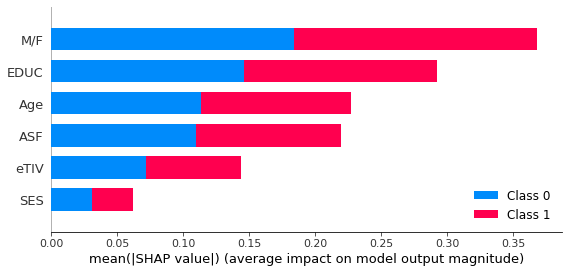

In [ ]:
explainer = shap.KernelExplainer(dtree.predict_proba,X_train_DF)

#compute shap_values
shap_values = explainer.shap_values(X_test_DF, approximate=True)

# visualize the prediction's explanation
shap.summary_plot(shap_values, X_test_DF)


In this plot, the SHAP feature importance are measured as the mean absolute Shapley values

As a first observation of SHAP feature importance plot, we can say that the M/F feature has the most important impact on the prediction of class (increasing or decreasing)  by changing the predicted disease probability on average by 40%
Also, we can remark that SES feature has an average impact less than 0.1
on the prediction result for each class 0 and 1.
So we can say, it has the less impact among all the features on the prediction of the disease.
This plot is unsufficient to have an idea about  of how it affects the prediction whcih means what is beyond this importance.

In order to clarify this importance , whe have to observe the summary plot which combines the feature importance with its effect.

          M/F       Age      EDUC       SES      eTIV       ASF
0   -0.860233  1.926124 -0.183005 -1.329601 -0.340376  0.246777
1    1.162476  0.886913  2.004675 -1.329601  0.659678 -0.733958
2    1.162476  0.237406  2.004675 -1.329601  1.309139 -1.264281
3   -0.860233 -0.282200  1.275448 -1.329601 -0.265659  0.159601
4   -0.860233 -2.230721  1.275448 -1.329601 -0.461072  0.377542
..        ...       ...       ...       ...       ...       ...
107 -0.860233  0.107505 -0.912232  0.409877 -0.823161  0.806159
108  1.162476  0.107505 -0.183005  0.409877 -0.961099  0.980512
109  1.162476 -0.152298 -0.912232  0.409877  0.429781 -0.530546
110  1.162476  1.536420 -0.912232  1.279616  0.015965 -0.138252
111 -0.860233  0.367307 -0.912232 -0.459862 -0.300144  0.203189

[112 rows x 6 columns]
[0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0

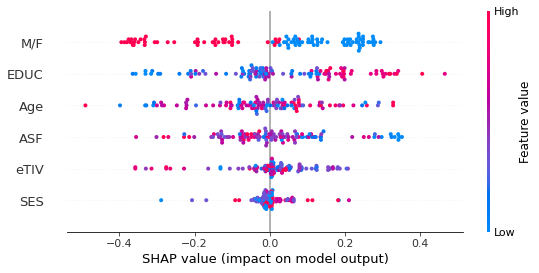

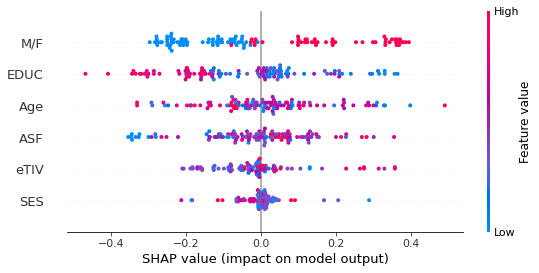

23
SHAP values for sample 0 pour classe 1 [-0.19980843 -0.07113665  0.04348659 -0.00261814 -0.18065134  0.00076628]
and the predicted class is 0


In [ ]:
#Explanation according to one class (0 or 1)
print(X_test_DF)

y_pred=dtree.predict(X_test)
print(y_pred)
shap.summary_plot(shap_values[0], X_test_DF)#class 0
shap.summary_plot(shap_values[1], X_test_DF)#class 1


print(max(df["EDUC"]))
#shap.dependence_plot(0, shap_values[0], X_test_DF, feature_names=X_test_DF["M/F"])

print("SHAP values for sample 0 pour classe 1",shap_values[1][0])#pour la deuxieme question
print("and the predicted class is",y_pred[0])

# Question 1: Local explanation

In [ ]:
print("SHAP values for sample 0 pour classe 1",shap_values[1][0])#pour la deuxieme question
print("and the predicted class is",y_pred[0])

SHAP values for sample 0 pour classe 1 [-0.19980843 -0.07113665  0.04348659 -0.00261814 -0.18065134  0.00076628]
and the predicted class is 0



When we try to print the shape values of the first individual (thats means sample 0),we remark that the feature M/F has the highest negative SHAP value whereas the other features (except eTIV)have SHAP values close to zero.The predicted class is 0.
 So,being a female has the most important effect to decrease the predicted probability of class 1(having the disease).







In [ ]:
print("SHAP values for sample nuber 111 pour classe 1",shap_values[1][110])#pour la deuxieme question
print("and the predicted class is",y_pred[110])

SHAP values for sample nuber 111 pour classe 1 [ 0.32969349 -0.07796935  0.21021711  0.00517241  0.01570881  0.10721584]
and the predicted class is 1


When we try to show the SHAP values for the fourth sample, we observe that the M/F feature has the most important positive SHAP value then the EDU feature comes after whereas the other features have close to zero ones.We have predicted the class 1.
As it is shown in the summary plot, a male person has more probability to catch the disease .Plus, a person with low EDU value will have enhance the probability of class 1.
It shows that the M/F feature has the most important effect on the nature of our output class which is coherent with the first plot.

# Question2:  General interpretation:
As a general interpretation, the M/F feature increases the predicted probability to have a disease for high values which means to be a man.
Plus, a well-educated person will have less probability to catch the disease.
Finally, the SES feature has , generally for most samples,a insignificant  effect on the predicted proobability for high or low feature's values.

Despite the score of this classifier, we can say that M/F feature is the most important feature to observe.


#V) Random Forest classifier.

### 1)  Train and evaluate a RF Classifier

In [ ]:
rf = sklearn.ensemble.RandomForestClassifier(max_depth=50, random_state=0)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.8482142857142857


### 2)  Global interpreation of the RF classifier
**TODO: interpretate the obtained results**

  0%|          | 0/112 [00:00<?, ?it/s]

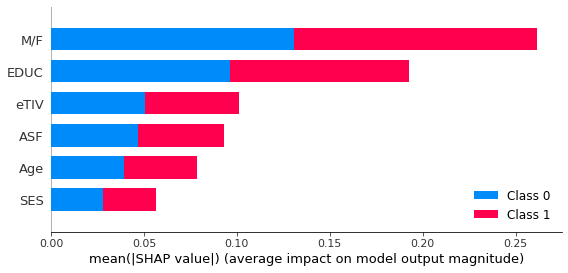

In [ ]:
explainer = shap.KernelExplainer(rf.predict_proba,X_train_DF)

#Compute shap_values
shap_values = explainer.shap_values(X_test_DF, approximate=True)

# visualize the prediction's explanation
shap.summary_plot(shap_values, X_test_DF)

AS it is shown by the SHAP feature importance plot, we can say that the M/F feature has at this time also the most important impact on the prediction of group by changing the predicted disease probability on average by 30% .Plus, we can say that Age and SES features have an average impact less than 0.1 on the prediction result for each class 0 and 1 compared with the DT classifier. So, they have the less impact among all the features on the prediction of the disease.

This plot doesn't show us the manner of how it affects the probability prediction.

In [ ]:
y_pred=rf.predict(X_test)
print(y_pred)
print(df)

[0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0]
     Group  M/F  Age  EDUC  SES  eTIV    ASF
0        0    1   27    14  2.0  1987  0.883
1        0    1   28    14  2.0  2004  0.876
2        1    1   15    12  2.0  1678  1.046
3        1    1   16    12  2.0  1738  1.010
4        1    1   20    12  2.0  1698  1.034
..     ...  ...  ...   ...  ...   ...    ...
368      1    1   22    16  1.0  1693  1.037
369      1    1   26    16  1.0  1688  1.040
370      0    0    1    13  2.0  1319  1.331
371      0    0    3    13  2.0  1327  1.323
372      0    0    5    13  2.0  1333  1.317

[373 rows x 7 columns]


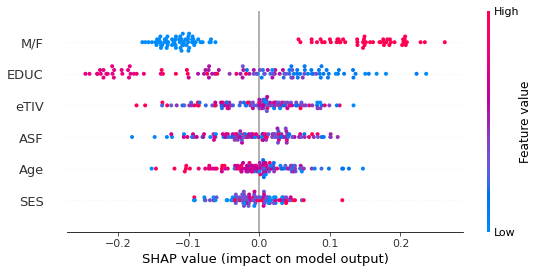

In [ ]:
#Explanation according to one class (0 or 1)
shap.summary_plot(shap_values[1], X_test_DF)#for class 1

The summary plot show us that the M/F feature has extreme SHAP values which means that it can affects hardly the predicted probability.
Also, being a well-educated person will decrease the probability of having the disease.

# Question 1: Local explanation

In [ ]:
print("SHAP values for sample 0 pour classe 1",shap_values[1][0])#pour la deuxieme question
print("and the predicted class is",y_pred[0])

SHAP values for sample 0 pour classe 1 [-0.12150383 -0.10546105  0.00781481 -0.03839719 -0.00368072 -0.03076437]
and the predicted class is 0


As it is show in the summary plot, the sample 0 has negative SHAP VALUE for most of the features.In fact, being a woman has is the responsable feature for increasing the probability of having the class 0 as an output.Moreover, this person is aged which decreases also the presence of the disease.This is well presented in the summary plot.

In [ ]:
print("SHAP values for sample 3 pour classe 1",shap_values[1][2])#pour la deuxieme question
print("and the predicted class is",y_pred[2])

SHAP values for sample 3 pour classe 1 [ 0.17576245  0.00893678 -0.0737599   0.03218008  0.03233716  0.04255109]
and the predicted class is 1


The fact of being a male has dominated the SHAP values and increases the predicted probability of having class 1(positive value) .Plus, although of being a well-educated person which means a negative SHAP value, it didn't affect the output result.This can explains the fact that the M/F feature is more important than the EDU feature.

# General interpretation

As  general interpretation , we can say that the M/F feature has the most important effect on the predicted probability compared with the EDU feature ; being a female person decreases the probability of having the disease despite of being well-educated.

The Age and SES feature have a negligible impact on the output since the SHAP values are generally close to 0 .


#VI) XGBoost classifier



### 1)  Train and evaluate a XGBoost Classifier

In [ ]:
# train an XGBoost model
model = xgboost.XGBClassifier(max_depth=50).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9961685823754789
0.7857142857142857


### 2)  Global interpreation of the XGBoost classifier
**TODO: interpretate the obtained results**

  0%|          | 0/112 [00:00<?, ?it/s]

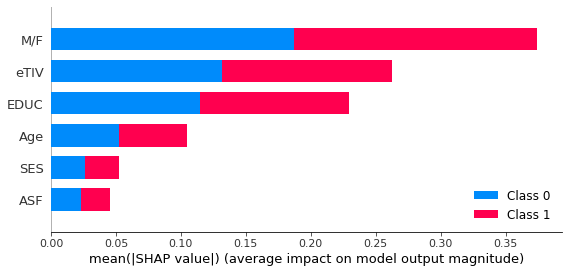

In [ ]:
explainer = shap.KernelExplainer(model.predict_proba,X_train_DF)
shap_values = explainer.shap_values(X_test_DF)
#shap_values = explainer.shap_values(X_test_DF, approximate=True)
# visualize the first prediction's explanation
shap.summary_plot(shap_values, X_test_DF,feature_names=["M/F", "Age","EDUC","SES","eTIV","ASF"])

AS it is shown by the SHAP feature importance figure, we observe that the M/F feature  still has the most important effect on the prediction of class by changing the predicted disease probability on average by 40% .Plus, we can say that Age  ,SES and ASF features have an average impact less than 0.1 on the prediction result for each class 0 and 1 compared with previous classifiers. However, for XGBosst classifier, the "eTIV" commes as the second important feature as it can the change the predictid probability by 25%.

We need to observe the summary plot as this figure doesn't show us  how the features affect the probability prediction

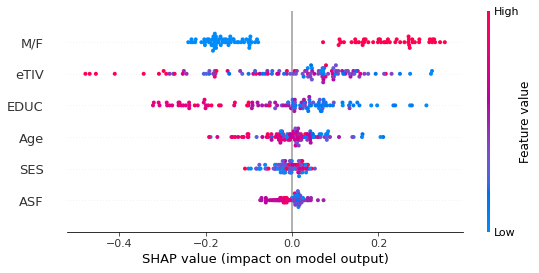

In [ ]:
#Explanation according to one class (0 or 1)
shap.summary_plot(shap_values[1], X_test_DF)

In [ ]:
print("SHAP values for sample 0 pour classe 1",shap_values[1][0])#pour la deuxieme question
print("and the predicted class is",y_pred[0])

SHAP values for sample 0 pour classe 1 [-0.17030569 -0.11608838  0.04895601 -0.06250954  0.06849269 -0.05247092]
and the predicted class is 0


Despite of having positive SHAP Value for EDU and eTIV features which ,in a usual case, increases the probability of obtaining the class 1 , we have class 0 as predicted output.This can be explained by the fact that we have a negative value of M/F feature decreasing the predicted probability since it has the important impact as shown in the figure above.

In [ ]:
print("SHAP values for sample 3 pour classe 1",shap_values[1][110])#pour la deuxieme question
print("and the predicted class is",y_pred[110])

SHAP values for sample 3 pour classe 1 [ 0.33122059 -0.03874488  0.06645651  0.01387265  0.15589703  0.01713027]
and the predicted class is 1


Since the first sample was clear enough to make an interpretation, we'd like to observe the SHAP values of another sample as shown above.
In fact, having positive values for the important features has lead to have class 1 as predicted class which seems to be logical case.

# General interpretation
According to the summary and SHAP feature importance plot, we can conclude that a high value for M/F feature wich means to be a man leads to an in increase in class 1 predicted probability.Plus, generally , a low value for eTIV and EDU feature will increase the probability of having the class 1 as a predicted class as the are on in second and third place for importance order.
The ASF and SES feature have a negligible effect on the output since the SHAP values are close to 0 for most samples.

#VII) Deep Learning

### 1)  Define the architecture

In [ ]:
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = Sequential()
model.add(Dense(32, input_shape=(6,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                224       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)               

### 2)  Train and evaluate a Deep Learning based  Classifier

In [ ]:
y_test_cat = to_categorical(y_test, 2)
y_train_cat =to_categorical(y_train, 2)
model.fit(np.asarray(X_train), np.asarray(y_train_cat), validation_split=0.3, epochs=100, verbose=1,batch_size=4)
model.evaluate(X_test,y_test_cat)

Epoch 1/100
46/46 [==============================] - 2s 11ms/step - loss: 0.6675 - accuracy: 0.5824 - val_loss: 0.6476 - val_accuracy: 0.6076
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5495 - val_loss: 0.6338 - val_accuracy: 0.6203
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.5824 - val_loss: 0.6129 - val_accuracy: 0.6076
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6228 - accuracy: 0.6429 - val_loss: 0.6148 - val_accuracy: 0.6456
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.6044 - val_loss: 0.6054 - val_accuracy: 0.6582
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.6099 - val_loss: 0.6111 - val_accuracy: 0.6456
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.5824 - val_loss: 0.6297 - val_accuracy: 0.5823
Epoch 8/100


[1.133725643157959, 0.7678571343421936]

### 2)  Global interpreation of the DL classifier
**TODO: interpretate the obtained results**

9/9 [==============================] - 0s 2ms/step


  0%|          | 0/112 [00:00<?, ?it/s]

506/506 [==============================] - 1s 2ms/step


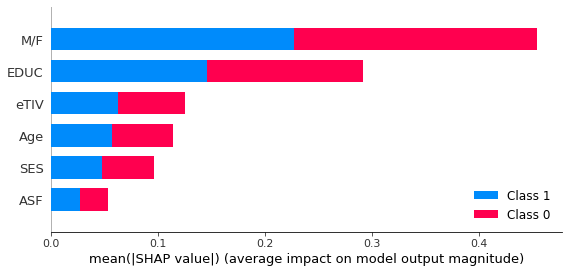

In [ ]:
explainer = shap.KernelExplainer(model.predict,X_train_DF)
shap_values = explainer.shap_values(X_test_DF)

# visualize the first prediction's explanation with a summary plot
shap.summary_plot(shap_values, X_test_DF,feature_names=["M/F", "Age","EDUC","SES","eTIV","ASF"])

As a first observation of SHAP feature importance plot, we remark that the M/F feature as usual has the important role for the prediction of the output class (increasing or decreasing) by changing the predicted output probability by 40% Plus, the SES and ASF features have an average impact less than 0.1 on the prediction result .So they are the less important features fot the prediction probability.

 This plot is unsufficient to be interpreted since it hides what is beyond the feature's importance.

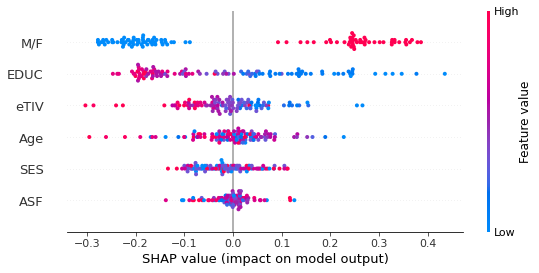

In [ ]:
#Explanation according to one class (0 or 1)
shap.summary_plot(shap_values[1], X_test_DF,feature_names=["M/F", "Age","EDUC","SES","eTIV","ASF"])

Similar to the previous classifier, The M/F is the most important feature; a high value will lead to an increase of the preficted probability.
Moreover, the EDU feature have many samples with extreme SHAP values so it can has an important role for the predicted output.

 As shown in the figure above,the samples for the SES and ASF features have SHAP values close to 0.

In [ ]:
print("SHAP values for sample 0 pour classe 1",shap_values[1][0])#pour la deuxieme question
print("and the predicted class is",y_pred[0])

SHAP values for sample 0 pour classe 1 [-0.15703261  0.01067906 -0.03158209  0.08419403  0.04814898  0.01916743]
and the predicted class is 0


According to the SHAP value shown for the sample0, the M/F feature has the highest negative value , so it has affected hardly the output prediction.Its value had decreased the probability of having the class 1 as an output which is the case.Other values are close to 0 and negligible compared with M/F 's value.

In [ ]:
print("SHAP values for sample 3 pour classe 1",shap_values[1][2])#pour la deuxieme question
print("and the predicted class is",y_pred[2])

SHAP values for sample 3 pour classe 1 [ 0.24811672  0.00413119 -0.18298653 -0.02394428 -0.06396772 -0.00292709]
and the predicted class is 1


Despite of having a negative SHAP value for the EDU feature , the predicted class is 1.This can be explained by the fact that we have a high positive value for M/F feature.This exemple show us the importance of this feature compared with other ones.

# General interpretation
According to the summary and SHAP feature importance plot, we can say that a high value for M/F feature  leads to a significant  increase in class 1 predicted probability.Plus, generally , a low value for  EDU feature will increase the probability of having the class 1 as a predicted class as it cames in the second place for the importance order.
As seen above, the M/F feature has the important impact on the model's prediction.
Plus,The ASF and SES feature have  also a negligible impact on the output since the SHAP values are close to 0 .

# Conclusion

According to all these classifiers' results, The M/F feature has the important impact on the predicted probability compared with the SES which has an negligible role for all classifiers.